# IEEE-CIS Fraud Detection Data Set:
* Why Fraud Detection? 
    * Fraud detection is a set of activities undertaken to prevent money or property from being obtained through false pretenses. Fraud detection is applied to many industries such as banking or insurance. In banking, fraud may include forging checks or using stolen credit cards. 
* This competition is a binary classification problem - i.e. our target variable is a binary attribute (Is the user making the click fraudulent or not?) and our goal is to classify users into "fraudulent" or "not fraudulent" as well as possible. 

In this kernel I did deep dive Exploratory Data Analysis(EDA) on The IEEE-CIS Fraud Detection dataset to understand patterns of fraudulent transactions. Don’t forget to upvote if you find this kernel helpful. I suggest you also read the complete dataset overview and data description found in IEEE-CIS Fraud Detection page. https://www.kaggle.com/c/ieee-fraud-detection/overview 

You can glance at my util function notebooks to have an idea how i eased the EDA process at my GitHub page. https://github.com/ElifKarakutukDinc/IEEE-CIS-Fraud-Detection 

# Exploratory Data Analysis(EDA) 
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypotheses and to check assumptions with the help of summary statistics and graphical representations.

* To take a closer look at the data take help of the '.head()` function of pandas library which returns the first five observations of the data set.Similarly `.tail()` returns the last five observations of the data set.
* To find out the total number of rows and columns in the data set using `.shape`.
* To see label of each columns in the data set using `.columns.values`
* It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not with `.info()`
* The `.describe()` function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.
* Few key insights just by looking at dependent variable are as follows:
    * `.unique()`
    * `.value_counts()`
* To check missing values in the data set's columns using `.isnull().sum()`
* To check `Outliers`: `A box plot` (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.
* To check `the linearity of the variables` it is a good practice to `plot distribution graph` and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

## Data Understanding & Wrangling:
### Transaction Table 
    * TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
    * TransactionAMT: transaction payment amount in USD
    * ProductCD: product code, the product for each transaction
    * card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
    * addr: address
    * dist: distance
    * P_ and (R__) emaildomain: purchaser and recipient email domain
    * C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
    * D1-D15: timedelta, such as days between previous transaction, etc.
    * M1-M9: match, such as names on card and address, etc.
    * Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
#### Categorical Features:
    * ProductCD
    * card1 - card6
    * addr1, addr2
    * P_emaildomain
    * R_emaildomain
    * M1 - M9

### Identity Table
    * Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
    * They're collected by Vesta’s fraud protection system and digital security partners.
    * (The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

    * “id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C. I hope you could get basic meaning of these features, and by mentioning them as numerical/categorical, you won't deal with them inappropriately.”
    
#### Categorical Features:
    * DeviceType
    * DeviceInfo
    * id_12 - id_38   

In [1]:
%load_ext lab_black

In [2]:
# This library is to work with Data Frames
import pandas as pd

# This library is to work with vectors
import numpy as np

# This library is to visualise statistical graphs
import seaborn as sns

# This library is to visualise graphs
import matplotlib.pyplot as plt

# To set some plotting parameters
from matplotlib import rcParams

# To supplies classes for manipulating dates and times
import datetime

# Library to work with Regular Expressions
import re

# To ignore filterwarnings
import warnings

# This library is to create displays
from IPython.display import Image


# Calling reporting functions from util_reporting
from util_reporting import (
    swarmplot_viz,
    crosstab_viz,
    factor_plot_viz,
    relationship_viz,
    df_first_look,
    df_descriptive_statistics,
    countplot_viz,
    df_pivot_aggregated_statistics,
    multiple_plot_viz,
    boxplot_viz,
    histogram_viz,
    histogram_multiple_viz,
    distplot_viz,
    correlation_chart,
    distplot_log_viz,
    countplot_pointplot_viz,
)

# Calling reporting functions from util_data_cleaning
from util_data_cleaning import (
    extract_first_string,
    df_numeric_column_filler_with_aggregated_data,
    missing_data_finder,
)

# Calling feature engineering functions from util_feature_engineering
from util_feature_engineering import (
    calculating_zscore,
    creating_date_columns,
)


%matplotlib inline
warnings.filterwarnings("ignore")
%config Completer.use_jedi = False

# Setting a universal figure size<
rcParams["figure.figsize"] = 8, 6

### Uploading data sets:

In [3]:
# Transaction CSVs
train_transaction = pd.read_csv("train_transaction.csv")
test_transaction = pd.read_csv("test_transaction.csv")
# Identity CSVs - These will be merged onto the transactions to create additional features
train_identity = pd.read_csv("train_identity.csv")
test_identity = pd.read_csv("test_identity.csv")
# Sample Submissions
sample_submission = pd.read_csv("sample_submission.csv")

### The First Looking to Data Set:
* I called `df_first_look` from `util_reporting.py`. 
* This function returns;
    * First 5 rows of dataframe
    * Last 5 rows of dataframe
    * Row count of dataframe
    * Column count of dataframe
    * List of columns in the dataframe
    * Looking NaN values and datatypes of columns in the dataframe

In [4]:
df_first_look(train_transaction)

First 5 rows of dataframe:
--------------------------
    TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338 

In [5]:
df_first_look(train_identity)

First 5 rows of dataframe:
--------------------------
    TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T

In [6]:
df_first_look(test_transaction)

First 5 rows of dataframe:
--------------------------
    TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  ...  V330  V331  V332  V333 V334 V335  \
0  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
1  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
2  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
3  150.0        visa  166.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
4  150.0  mastercard  117.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   

   V336  V337  V338  V339  
0  

In [7]:
df_first_look(test_identity)

First 5 rows of dataframe:
--------------------------
    TransactionID  id-01     id-02  id-03  id-04  id-05  id-06  id-07  id-08  \
0        3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
1        3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
2        3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3        3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   
4        3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN    NaN   

   id-09  ...                    id-31  id-32     id-33           id-34  \
0    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   
1    0.0  ...  chrome 67.0 for android   24.0  1280x720  match_status:2   
2    NaN  ...       ie 11.0 for tablet    NaN       NaN             NaN   
3    0.0  ...  chrome 67.0 for android    NaN       NaN             NaN   
4    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   

   id-35 id-36 id-3

* Data sets contain Float, integer and object types of data.
* All data sets contain null/missing values. 

* I want to see whether there is enough associated transactionID between train_transaction table and train_identity table. If there is enough associated transactionID we can look at the relationship between the identity table's columns and isFraud column of the transaction table.  

In [8]:
# To see, how many TransactionIDs in train_transaction have an associated train_identity.
print(
    np.sum(
        train_transaction["TransactionID"].isin(
            train_identity["TransactionID"].unique()
        )
    )
)

144233


* 24.4% of TransactionIDs in the train have an associated train_identity. There is no enough associated transactionID to built the relationship between the identity table's columns and isFraud column of the transaction table.

### To Check Missing Values:

* I called `missing_data_finder` from `util_data_cleaning.py`. 
* This function returns;
    * Finding missing values and showing these percentages in the columns of the dataframe. 

In [9]:
missing_data_finder(train_transaction).head()

,column_name,missing_row_count,missing_row_percent
14,dist2,552913,0.9363
37,D7,551623,0.9341
43,D13,528588,0.8951
44,D14,528353,0.8947
42,D12,525823,0.8904


In [10]:
missing_data_finder(test_transaction).head()

,column_name,missing_row_count,missing_row_percent
13,dist2,470255,0.9281
36,D7,446558,0.8813
41,D12,437437,0.8633
38,D9,432353,0.8533
37,D8,432353,0.8533


##### Observations: 
* We found NaN values of columns in dataframes. 
    * 374 columns of total columns (394) of train_transaction dataframe have NaN values. 
    * 345 columns of total columns (393) of test_transaction dataframe have NaN values. 

### Changing Categorical Column's Values: 
### IsFraud Column:

* The IsFraud column has two categories: 0 and 1. Since this column is coded numerically it is not easy to understand which value is equal to which label. So I'm coding new values: `1 = "Fraud", 0 = "Non-Fraud"`. 

In [11]:
train_transaction["isFraud_"] = np.where(
    train_transaction["isFraud"] == 1, "Fraud", "Non-Fraud"
)

In [12]:
train_transaction["isFraud_"].value_counts()

Non-Fraud    569877
Fraud         20663
Name: isFraud_, dtype: int64

##### Observation:
* We changed categorical names as Fraud and Non-Fraud.
* Count of Non-Fraud transaction more than count of Fraud transaction. 

## Understanding Variables:
### Categorical Features:

### ProductCD:
* `Definition:` ProductCD is product code that the product for each transaction. In the data description post, they state that ProductCD is a service and not a physical product.  
* `Categories & Labels:` C, W, R, H, S

In [13]:
train_transaction.ProductCD.value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

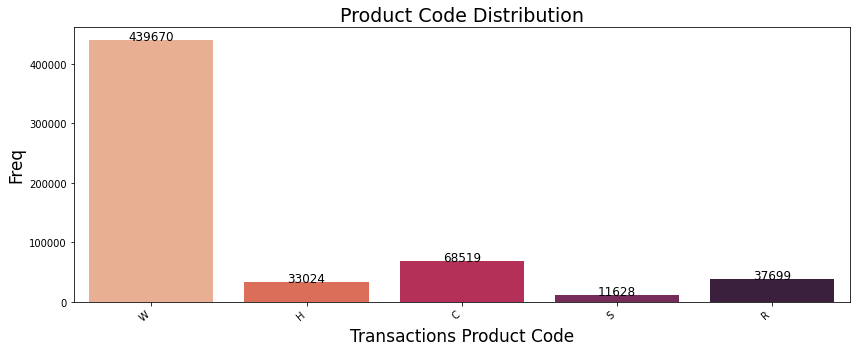

In [14]:
countplot_viz(
    train_transaction,
    "ProductCD",
    "Transactions Product Code",
    "Freq",
    "Product Code Distribution",
    palette="rocket_r",
)

##### How to Read The Graph: 
* This graph shows the count of ProductCDs. 
* x column shows categories, y column shows counts of categories.

##### Observation:
* Count of product code W more than count of other codes. 

### Card1-Card6:
* `Definition:` card1 - card6: Payment card information, such as card type, card category, issue bank, country, etc.  
* `Definition od Card4:` Card4 shows card distributer types. 
    * `Categories & Labels:` Visa, Mastercard, American express, Discover 
* `Definition od Card6:` Card6 shows card types. 
    * `Categories & Labels:` Debit, Credit, Debit or Credit , Charge card      

In [15]:
card_cols = [c for c in train_transaction.columns if "card" in c]
train_transaction[card_cols].head(3)

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit


* We can only describe card4 and card6 in all these columns. 

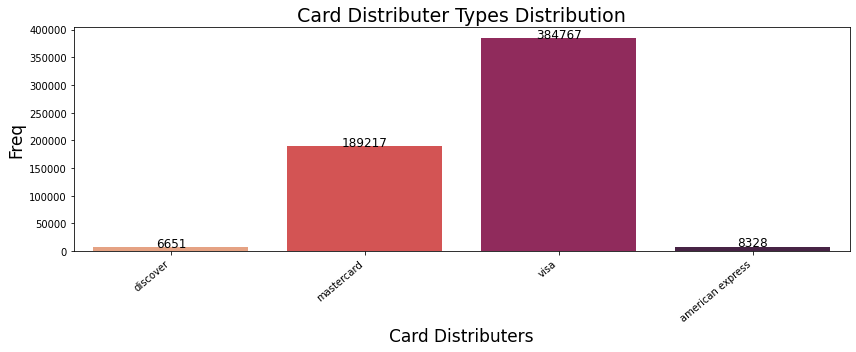

In [16]:
# For card4:
countplot_viz(
    train_transaction,
    "card4",
    "Card Distributers",
    "Freq",
    "Card Distributer Types Distribution",
    palette="rocket_r",
)

##### How to Read The Graph: 
* This graph shows the count of Card Distributor Types. 
* x column shows Card Distributors, y column shows counts of Card Distributors.

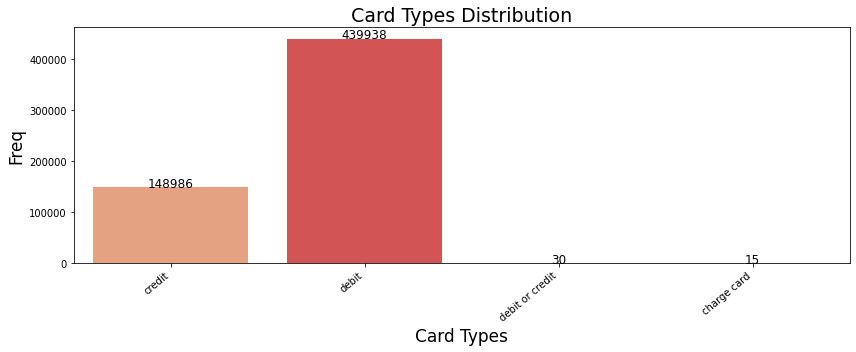

In [17]:
# For card6:
countplot_viz(
    train_transaction,
    "card6",
    "Card Types",
    "Freq",
    "Card Types Distribution",
    palette="rocket_r",
)

##### How to Read The Graph: 
* This graph shows the count of Card Types. 
* x column shows card types, y column shows counts of card types.

##### Observation:
* Card4: 
    * Count of "visa card" is more than count of other card distributors. 
* Card6: 
    * Count of "debit card" is more than count of other card types. 

### addr1 - addr2:
* `Definition:` They show address. Both addresses are for purchaser. 
    * addr1 as billing region
    * addr2 as billing country

### addr1:

In [18]:
# Unique count of Regions:
train_transaction.addr1.nunique()

332

In [19]:
# To find top 10 regions by count of transaction.
addr1_df = pd.DataFrame(train_transaction.addr1.value_counts())
addr1_df = addr1_df.rename_axis("region").reset_index()
addr1_df = addr1_df.sort_values(by=["addr1"], ascending=False).head(10)
top_region_df = train_transaction[
    train_transaction["addr1"].isin(list(addr1_df["region"]))
]

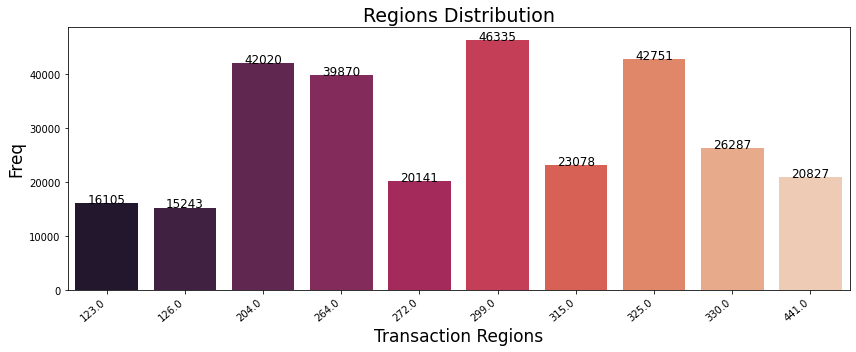

In [20]:
countplot_viz(
    top_region_df,
    "addr1",
    "Transaction Regions",
    "Freq",
    "Regions Distribution",
    palette="rocket",
)

### addr2:

In [21]:
# Unique count of Country:
train_transaction.addr2.nunique()

74

In [22]:
# To find top 5 countries by count of transaction.
addr2_df = pd.DataFrame(train_transaction.addr2.value_counts())
addr2_df = addr2_df.rename_axis("country").reset_index()
addr2_df = addr2_df.sort_values(by=["addr2"], ascending=False).head()
top_country_df = train_transaction[
    train_transaction["addr2"].isin(list(addr2_df["country"]))
]

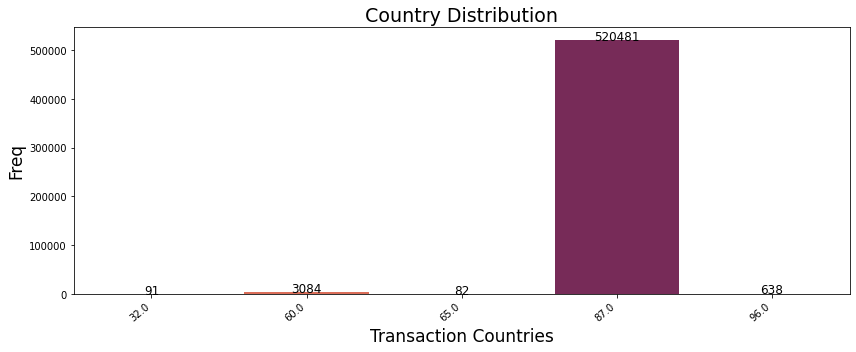

In [23]:
countplot_viz(
    top_country_df,
    "addr2",
    "Transaction Countries",
    "Freq",
    "Country Distribution",
    palette="rocket_r",
)

##### Observation:
* addr1: 
    * There are 332 unique regions in dataframe. We show top 10 regions that have most transactions.  
* addr2: 
    * There are 74 unique countries in dataframe. We show top 5 countries that have most transactions.

### P_emaildomain: 
* `Definition:` They show purchaser email domain.
* I will group all email domains by the respective enterprises.
* Also, I won't include less than 1000 entries in analysis.

In [24]:
P_email_df = pd.DataFrame(train_transaction.P_emaildomain.value_counts())
P_email_df = P_email_df.rename_axis("email").reset_index()
P_email_df = P_email_df[P_email_df["P_emaildomain"] > 1000]
Pemail_df = train_transaction[
    train_transaction["P_emaildomain"].isin(list(P_email_df["email"]))
]

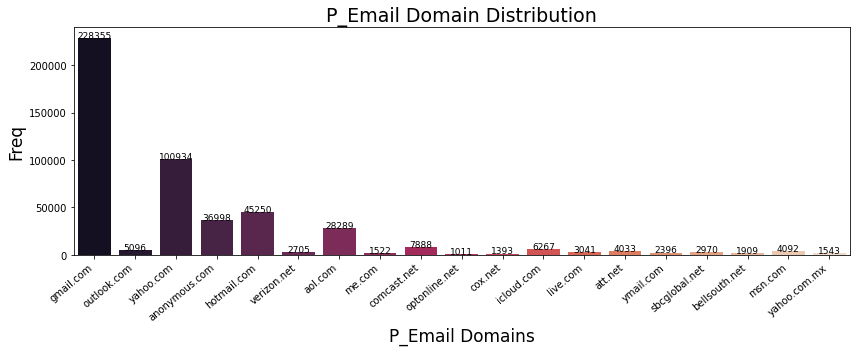

In [25]:
countplot_viz(
    data=Pemail_df,
    xcolumn="P_emaildomain",
    xlabel="P_Email Domains",
    ylabel="Freq",
    title="P_Email Domain Distribution",
    palette="rocket",
    fontsize_text=9,
)

##### How to Read The Graph: 
* This graph shows the count of transaction's email domains. 
* x column shows email domains, y column shows counts of email domain transactions.

##### Observation:
* Transactions that were done with Gmail and Outlook have the most count.

### R_emaildomain: 
* `Definition:` They show recipient email domain. Certain transactions don't need recipient, so R_emaildomain is null.
* I will group all email domains by the respective enterprises.
* Also, I won't include less than 1000 entries in analysis.

In [26]:
R_email_df = pd.DataFrame(train_transaction.R_emaildomain.value_counts())
R_email_df = R_email_df.rename_axis("email").reset_index()
R_email_df = R_email_df[R_email_df["R_emaildomain"] > 1000]
Remail_df = train_transaction[
    train_transaction["R_emaildomain"].isin(list(R_email_df["email"]))
]

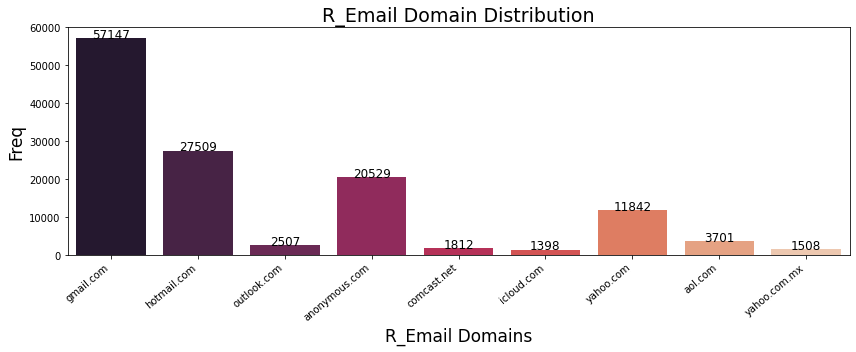

In [27]:
countplot_viz(
    data=Remail_df,
    xcolumn="R_emaildomain",
    xlabel="R_Email Domains",
    ylabel="Freq",
    title="R_Email Domain Distribution",
    palette="rocket",
)

##### How to Read The Graph: 
* This graph shows the count of transaction's email domains. 
* x column shows email domains, y column shows counts of email domain transactions.

##### Observation:
* Transactions that were done with Gmail and Hotmail have the most count. 
* At here most second transaction count belongs to Hotmail but at P_emaildomain most second transaction count belongs to Outlook. 

### M1- M9:
* `Definition:` They show match, such as names on card and address, etc.
* `Categories & Labels:` T = True, F= False, NaN values
* `Categories & Labels for M4:` M0, M1, M2

In [28]:
M_cols = [m for m in train_transaction.columns if "M" in m]
train_transaction[M_cols].head(3)

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F


In [29]:
train_transaction.M4.value_counts()

M0    196405
M2     59865
M1     52826
Name: M4, dtype: int64

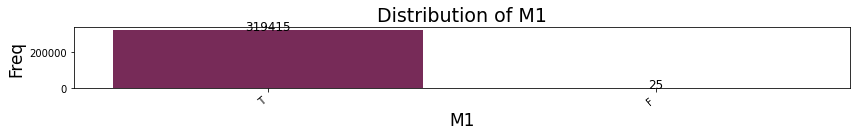

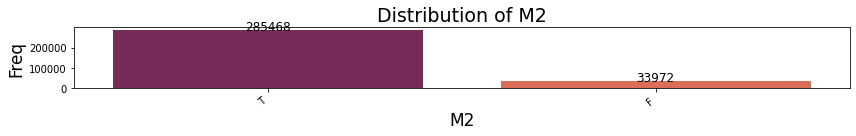

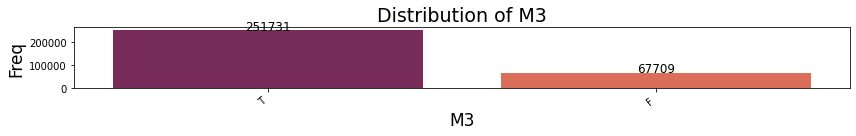

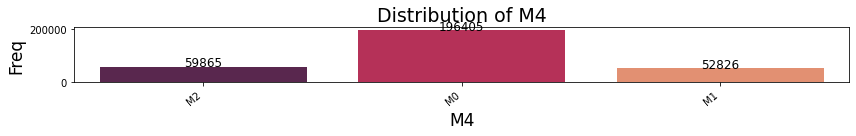

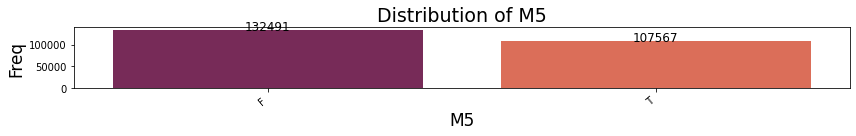

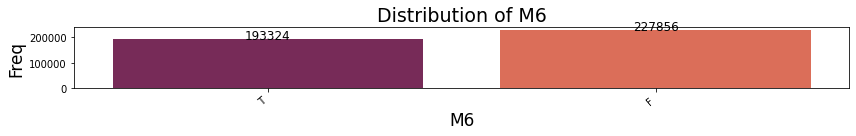

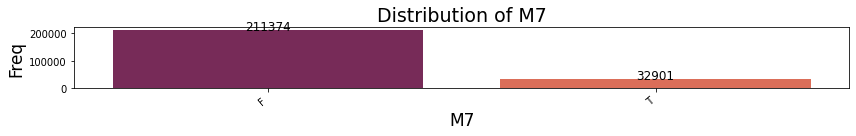

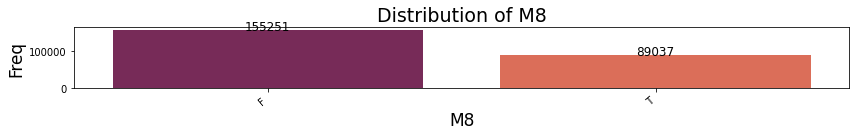

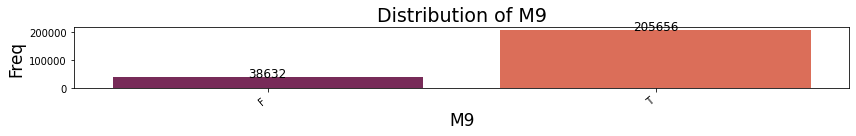

In [30]:
for col in ["M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9"]:
    countplot_viz(
        train_transaction,
        col,
        col,
        "Freq",
        "Distribution of " + col,
        palette="rocket",
        fontsize_label=11,
        fontsize_title=15,
        figsize_x=12,
        figsize_y=2,
    )

##### How to Read The Graph: 
* These graphs show the count of matching. 
* x column shows M situations, y column shows counts of matching situations.

##### Observation:
* M5, M6, M7, M8 have high false matching than true matching. We don't know what they represent. We'll look at whether false matching has fraud activities. 

### Numerical Features:
### TransactionAmt:

* `Definition:` TransactionAmt shows transaction payment amount in USD.

* I called `df_descriptive_statistics` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and list of columns to visualize descriptive statistics about those columns.

In [31]:
list_of_column_descriptive = ["TransactionAmt"]
df_descriptive_statistics(train_transaction, list_of_column_descriptive)

Descriptive Statisctics for column:
--------------------------
        TransactionAmt
count   590540.000000
mean       135.027176
std        239.162522
min          0.251000
25%         43.321000
50%         68.769000
75%        125.000000
max      31937.391000

Mode values for column:
--------------------------
    TransactionAmt
0            59.0



* To find outliers in the dataset we can use two different ways:  
    * To see whether there are outliers we visualize a Boxplot.
    * To find frequency of |z-score| > 3 transaction amounts. It gives us the count of outliers. 

* To Visualize The Boxplot:
    * I called `boxplot_viz` from `util_reporting.py`.
    * This function does;
        * This function visualizes a boxplot for a column.

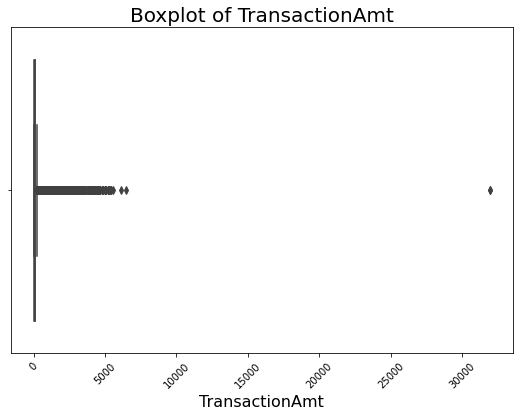

In [32]:
boxplot_viz(
    train_transaction,
    "TransactionAmt",
    xlabel="TransactionAmt",
    title="Boxplot of TransactionAmt",
)

##### How to Read The Graph: 
* This graph shows boxplot of the TransactionAmt column. 
* `The minimum` (the smallest number in the data set). The minimum is shown at the far left of the chart, at the end of the left “whisker.”
* `First quartile`, Q1, is the far left of the box (or the far right of the left whisker).
* `The median` is shown as a line in the center of the box.
* `Third quartile`, Q3, shown at the far right of the box (at the far left of the right whisker).
* `The maximum` (the largest number in the data set), shown at the far right of the box.
* Data sets can sometimes contain `outliers` that are suspected to be anomalies (perhaps because of data collection errors or just plain old flukes). If outliers are present, the whisker on the appropriate side is drawn to 1.5 * IQR rather than the data minimum or the data maximum. Small circles or unfilled dots are drawn on the chart to indicate where suspected outliers lie. Filled circles are used for known outliers.

* To Calculate The z_score Column:
    * I called `calculating_zscore` from `util_feature_engineering.py`.
    * This function does;
        * This function calculating z score for column list. 
        * Creating new column to show outlier and non-outlier values as categorical. 

In [33]:
cols = ["TransactionAmt"]
train_transaction = calculating_zscore(train_transaction, cols)

In [34]:
# Total outlier and non-outlier count:

train_transaction["TransactionAmt_zscore_outlier"].value_counts()

non-outlier    580447
outlier         10093
Name: TransactionAmt_zscore_outlier, dtype: int64

##### Observation:
* Descriptive Statistics: 
    * Avg, median and mode are totally different. Because of this situation distribution is right skewed (positive skew). 
    * Mean value shows average transaction amount is 135$. 
* Box Plot Graph and z score Table:
    * Outliers' count is huge at the TransactionAMT column. 
    * We'll use the TransactionAmt_zscore_outlier column to see if the outlier value is fraud or not. 

### C1-C14: 
* `Definition:` Counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

In [35]:
train_transaction[
    [
        "C1",
        "C2",
        "C3",
        "C4",
        "C5",
        "C6",
        "C7",
        "C8",
        "C9",
        "C10",
        "C11",
        "C12",
        "C13",
        "C14",
    ]
].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


##### Observation:
* The data is masked so we are not reviewing these columns. However, we'll look at the relationship between some of these columns and the isFraud column at the below cells.

### Time Series Features:
### TransactionDT:

* `Definition:` Timedelta from a given reference datetime (not an actual timestamp)

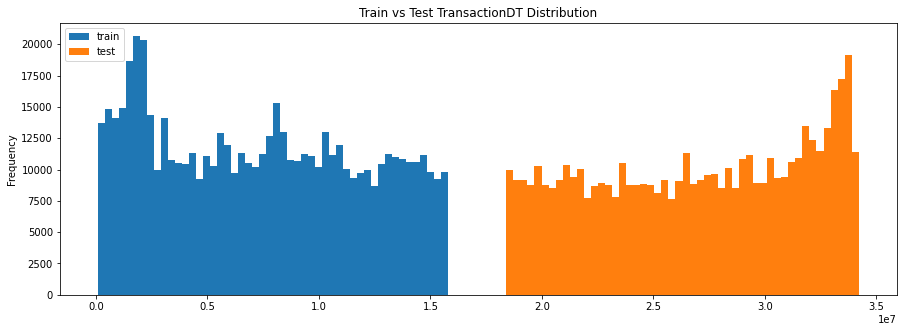

In [36]:
train_transaction["TransactionDT"].plot(
    kind="hist",
    figsize=(15, 5),
    label="train",
    bins=50,
    title="Train vs Test TransactionDT Distribution",
)
test_transaction["TransactionDT"].plot(kind="hist", label="test", bins=50)
plt.legend()

##### How to Read The Graph: 
* These graphs show distributions of transactionDT for test dataset and train dataset. 

* To convert timedelta column to time series column you can review the page that is at below link. 

https://www.kaggle.com/c/ieee-fraud-detection/discussion/100400#latest-579480

* I called `creating_date_columns` from `util_feature_engineering.py`.
* This function does;
    * Gets a Python Pandas dataframe and converting time delta date_column to date and creating new columns as date, weekdays, hours and days. 

In [37]:
creating_date_columns(train_transaction, "TransactionDT", START_DATE="2017-12-01")
train_transaction.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V337,V338,V339,isFraud_,TransactionAmt_zscore,TransactionAmt_zscore_outlier,Date,Weekdays,Hours,Days
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,Non-Fraud,-0.278167,non-outlier,2017-12-02 00:00:00,5,0,2
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,Non-Fraud,-0.443327,non-outlier,2017-12-02 00:00:01,5,0,2
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,Non-Fraud,-0.317889,non-outlier,2017-12-02 00:01:09,5,0,2


##### Observation:
* We converted the TransactionDT column. We'll use these columns at "Bivariate Relationships".

### Understanding Target Variable
### isFraud Column
* `Definition:` It shows fraud situation of transactions.  
* `Categories & Labels:` 0 = Non-Fraud, 1 = Fraud.
* I created "isFraud_" column for showing the column as categorical names. I'll use it to show bivariate relationships. 

In [38]:
train_transaction.isFraud_.value_counts()

Non-Fraud    569877
Fraud         20663
Name: isFraud_, dtype: int64

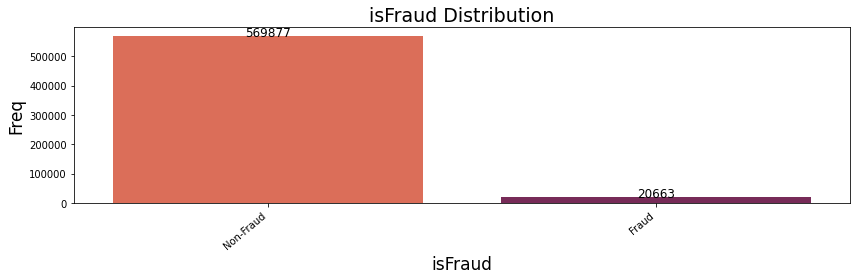

In [39]:
countplot_viz(
    train_transaction,
    "isFraud_",
    "isFraud",
    "Freq",
    "isFraud Distribution",
    palette="rocket_r",
    figsize_x=12,
    figsize_y=4,
)

##### How to Read The Graph: 
* This graph shows count of fraud and non-fraud transactions. 
* x column shows fraud situations, y column shows counts of fraud situations.

##### Observation:
* There are 3.4% Fraud transactions in the dataset.
* 3.4% seems small in all data but it can be changed if the amount percentage is higher or lower than 3.5% of total. We'll see it later.

## Bivariate Relationships:
### ProductCD & isFraud: 

In [40]:
pd.crosstab(
    train_transaction.isFraud_, train_transaction.ProductCD, margins=True
).style.background_gradient(cmap="mako")

ProductCD,C,H,R,S,W,All
isFraud_,,,,,,
Fraud,8008,1574,1426,686,8969,20663
Non-Fraud,60511,31450,36273,10942,430701,569877
All,68519,33024,37699,11628,439670,590540



* I called `countplot_pointplot_viz` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

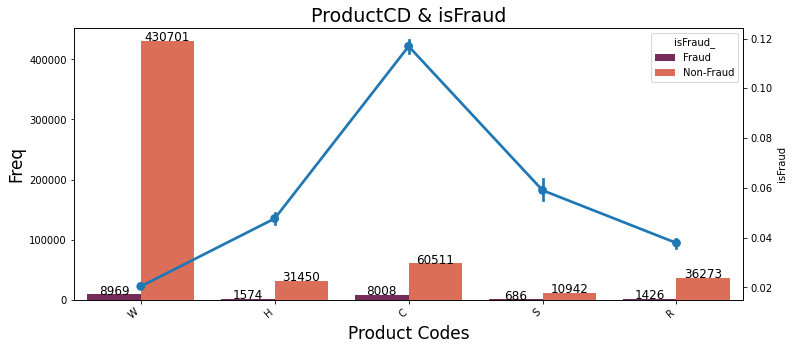

In [41]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    train_transaction,
    filter_list,
    "ProductCD",
    "isFraud_",
    "isFraud",
    "Product Codes",
    "Freq",
    "ProductCD & isFraud",
    palette="rocket",
)

##### How to Read The Graph: 
* Countplot shows count of fraud and non-fraud transactions by product codes.   
* Pointplot shows the percentage of fraud in all transaction of Product Codes. 
* x column shows product codes.
* y column shows; 
    * Counts of product codes by isFraud_ column.
    * Percentage of fraud in all transactions of Product Codes.

##### Observation:
* Most of transaction belong "W" product code. 
* The most fraudulent activities belong to the "C" product code with 11,5%.

### Card1-Card6 & isFraud: 

* We can use card4 and card6 for analyse. 
    * card4 : Credit card distributors
   
    * card6 : Card types

### Card4 & isFraud:

In [42]:
pd.crosstab(
    train_transaction.isFraud_, train_transaction.card4, margins=True
).style.background_gradient(cmap="mako")

card4,american express,discover,mastercard,visa,All
isFraud_,,,,,
Fraud,239,514,6496,13373,20622
Non-Fraud,8089,6137,182721,371394,568341
All,8328,6651,189217,384767,588963


* I called `countplot_pointplot_viz` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

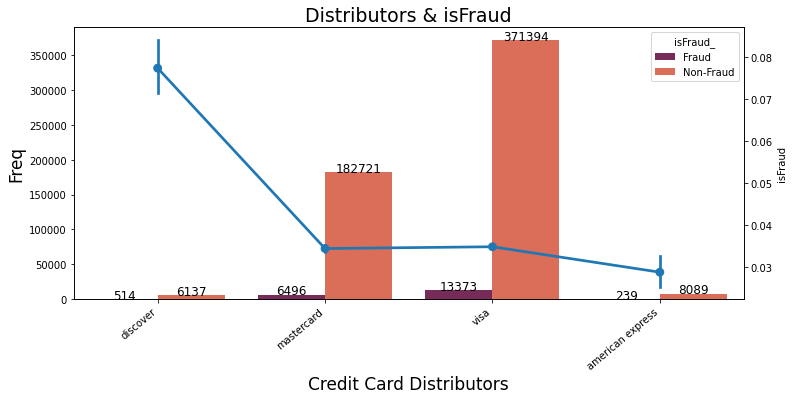

In [43]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    train_transaction,
    filter_list,
    "card4",
    "isFraud_",
    "isFraud",
    "Credit Card Distributors",
    "Freq",
    "Distributors & isFraud",
    palette="rocket",
)

##### How to Read The Graph: 
* Countplot shows the count of fraud and non-fraud transactions by card4.   
* Pointplot shows the percentage of fraud in all transactions of Credit Card Distributors. 
* x column shows Credit Card Distributors.
* y column shows; 
    * Counts of Credit Card Distributors by isFraud_ column.
    * Percentage of fraud in all transactions of Credit Card Distributors.

* The most of transactions were done with "visa". The second most of transactions were done with "mastercard". Because of the fraudulent transaction counts of these distributors are higher than others. But we should look that how much fraud there is in all transaction of these distributors. (as rate) 
    * In total transactions of visa, fraudulent transactions' percentage is 0,034. 
    * In total transactions of mastercard, fraudulent transactions' percentage is 0,034. 
    * In total transactions of discovery, fraudulent transactions' percentage is 0,077. 
    * In total transactions of american express, fraudulent transactions' percentage is 0,028. 
* Due to above results we can say that "discover" is more open to fraudulent activities than other distributors. 

### Card6 & isFraud:

In [44]:
pd.crosstab(
    train_transaction.isFraud_, train_transaction.card6, margins=True
).style.background_gradient(cmap="mako")

card6,charge card,credit,debit,debit or credit,All
isFraud_,,,,,
Fraud,0,9950,10674,0,20624
Non-Fraud,15,139036,429264,30,568345
All,15,148986,439938,30,588969


* I called `countplot_pointplot_viz` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


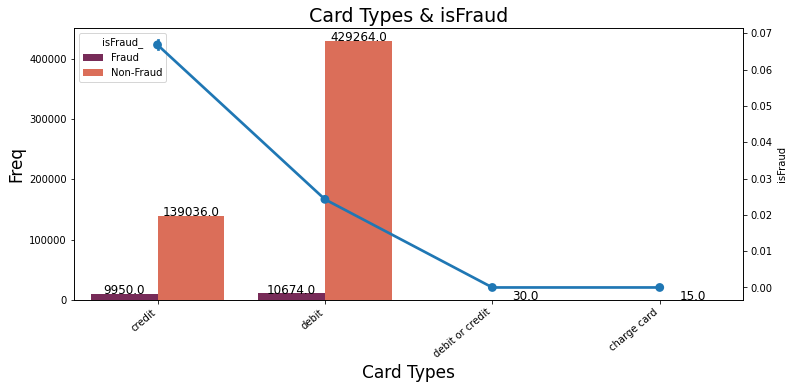

In [45]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    train_transaction,
    filter_list,
    "card6",
    "isFraud_",
    "isFraud",
    "Card Types",
    "Freq",
    "Card Types & isFraud",
    palette="rocket",
)

##### How to Read The Graph: 
* Countplot shows the count of fraud and non-fraud transactions by card6.   
* Pointplot shows percentage of fraud in all transactions of card types. 
* x column shows card types.
* y column shows; 
    * Counts of card types by isFraud_ column.
    * Percentage of fraud in all transaction of card types.

##### Observation:
* Most of the transactions were done with "debit". The second most of the transactions were done with "credit card". 
* In total transactions of credit card, fraudulent transactions' rate is 0,066%. This rate is highest rate in all card types. Due to that result we can say that "credit card" is more open to fraudulent activities than other distributors. 

### addr1-addr2 & isFraud:
### addr1 & isFraud:

* I called `countplot_pointplot_viz` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

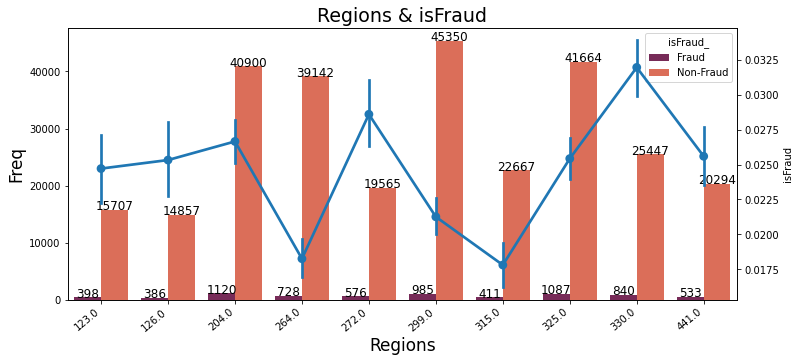

In [46]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    top_region_df,
    filter_list,
    "addr1",
    "isFraud_",
    "isFraud",
    "Regions",
    "Freq",
    "Regions & isFraud",
    palette="rocket",
)

##### How to Read The Graph: 
* Countplot shows the count of fraud and non-fraud transactions by addr1(Regions).   
* Pointplot shows the percentage of fraud in all transactions of regions. 
* x column shows regions.
* y column shows; 
    * Count of regions by isFraud_ column.
    * Percentage of fraud in all transactions of regions.

##### Observation:
* Most of transactions belong 299th region.  
* From the point of view of fraud transaction rate 330th, 272th, 204th have high fraudulent activities. 

### addr2 & isFraud:

* I called `countplot_pointplot_viz` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

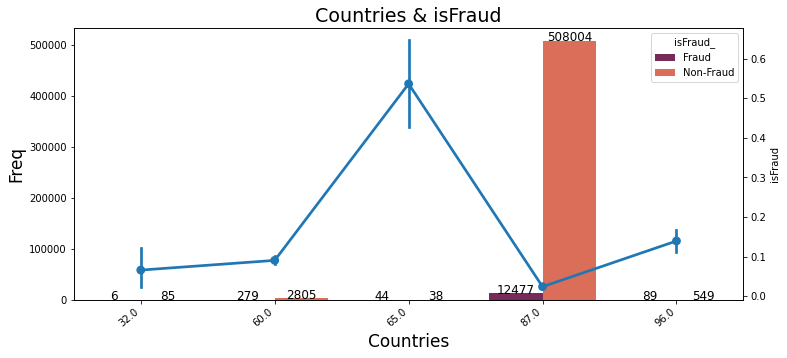

In [47]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    top_country_df,
    filter_list,
    "addr2",
    "isFraud_",
    "isFraud",
    "Countries",
    "Freq",
    "Countries & isFraud",
    palette="rocket",
)

##### How to Read The Graph: 
* Countplot shows the count of fraud and non-fraud transactions by addr2(Countries).   
* Pointplot shows the percentage of fraud in all transactions of countries. 
* x column shows countries.
* y column shows; 
    * Count of countries by isFraud_ column.
    * Percentage of fraud in all transactions of countries.

##### Observation:
* Most of transactions belong 87th country.  
* From the point of view of fraud transaction rate 65th has the highest fraudulent activities. 

### P_emaildomain & isFraud:

* I called `countplot_pointplot_viz` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

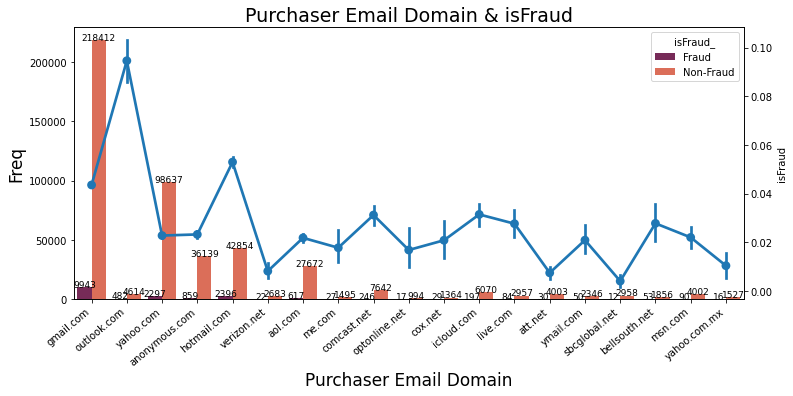

In [48]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    Pemail_df,
    filter_list,
    "P_emaildomain",
    "isFraud_",
    "isFraud",
    "Purchaser Email Domain",
    "Freq",
    "Purchaser Email Domain & isFraud",
    fontsize_text=9,
    palette="rocket",
)

##### How to Read The Graph: 
* Countplot shows the count of fraud and non-fraud transactions by P_emaildomain(Purchaser Email Domain).   
* Pointplot shows the percentage of fraud in all transactions of Purchaser Email Domain. 
* x column shows Purchaser Email Domain.
* y column shows; 
    * Count of Purchaser Email Domain by isFraud_ column.
    * Percentage of fraud in all transactions of Purchaser Email Domain.

##### Observation:
* The most of transactions belong to "gmail.com".  
* From the point of view of fraud transaction rate "outlook.com" has the highest fraudulent activities. 

### R_emaildomain & isFraud:

* I called `countplot_pointplot_viz` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

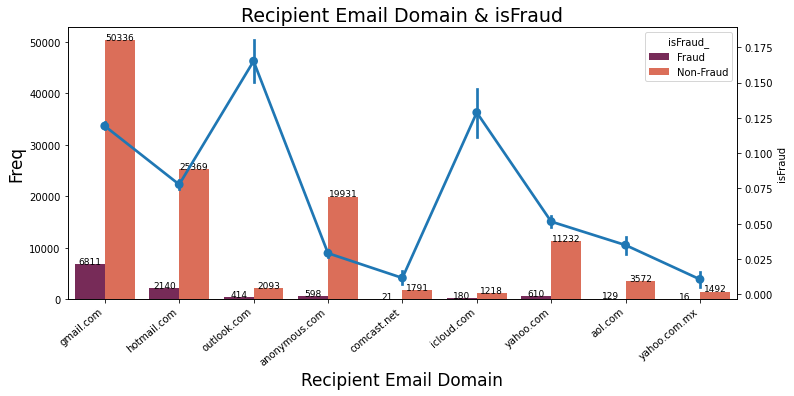

In [49]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    Remail_df,
    filter_list,
    "R_emaildomain",
    "isFraud_",
    "isFraud",
    "Recipient Email Domain",
    "Freq",
    "Recipient Email Domain & isFraud",
    fontsize_text=9,
    palette="rocket",
)

##### How to Read The Graph: 
* Countplot shows the count of fraud and non-fraud transactions by R_emaildomain(Recipient Email Domain).   
* Pointplot shows the percentage of fraud in all transactions of Recipient Email Domain. 
* x column shows Recipient Email Domain.
* y column shows; 
    * Count of Recipient Email Domain by isFraud_ column.
    * Percentage of fraud in all transactions of Recipient Email Domain.

##### Observation:
* Most of the transactions belong to "gmail.com". 
* From the point of view of fraud transaction rate "outlook.com" and "icloud.com" have the highest fraudulent activities. 

### M1-M9 & isFraud:

* I called `countplot_pointplot_viz` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

posx and posy should be finite values
posx and posy should be finite values


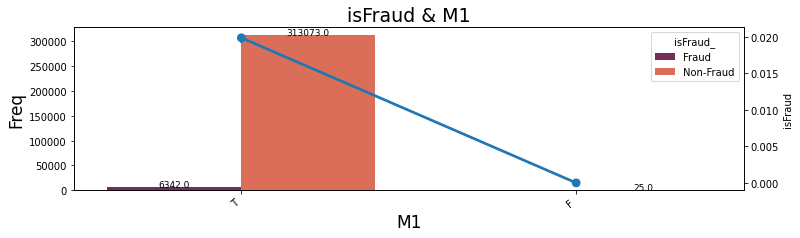

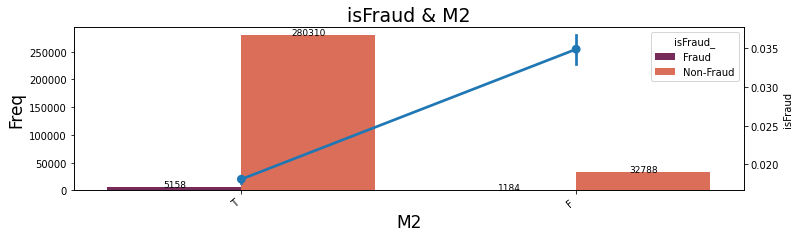

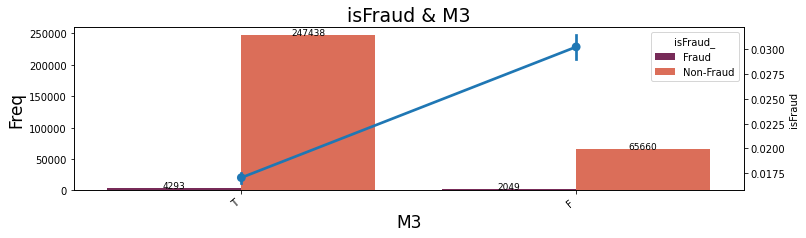

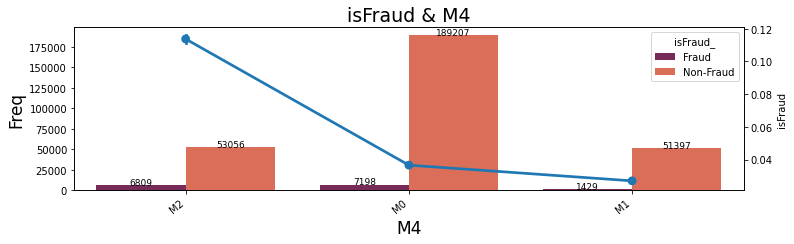

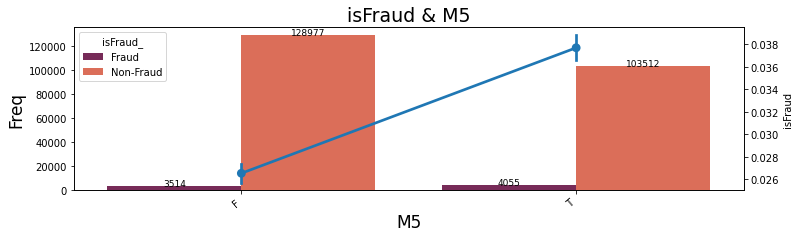

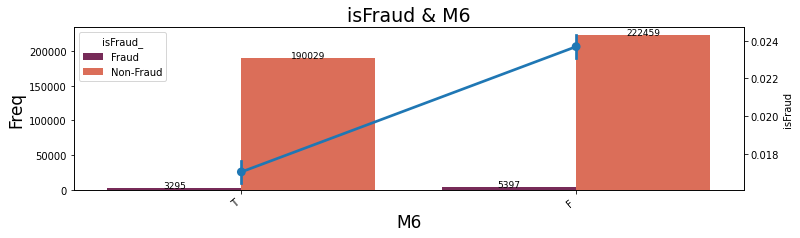

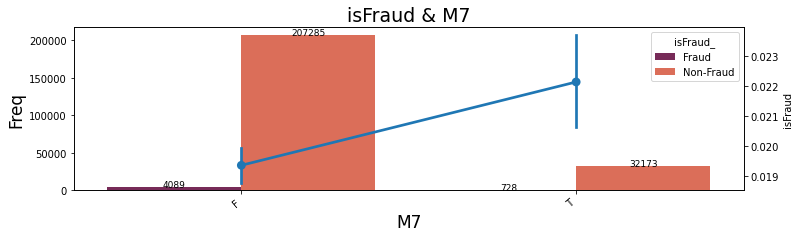

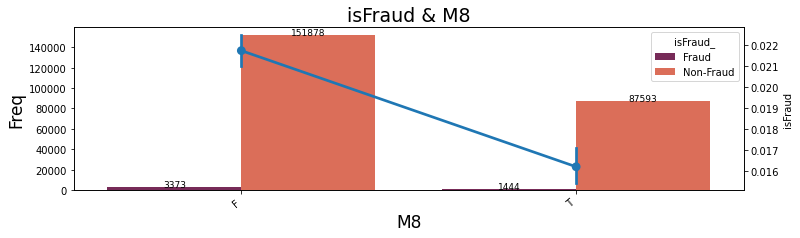

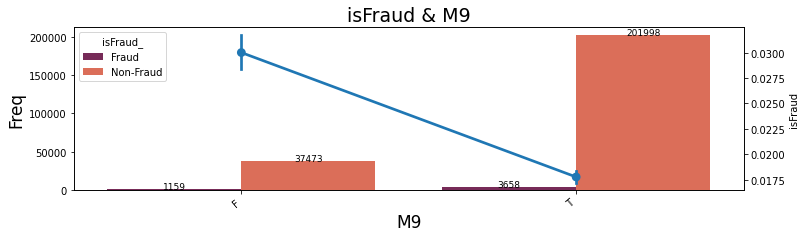

In [50]:
for col in ["M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9"]:
    filter_list = ["Fraud", "Non-Fraud"]
    countplot_pointplot_viz(
        train_transaction,
        filter_list,
        col,
        "isFraud_",
        "isFraud",
        col,
        "Freq",
        "isFraud & " + col,
        fontsize_text=9,
        fontsize_title=15,
        figsize_x=12,
        figsize_y=3,
        palette="rocket",
    )

##### How to Read The Graph: 
* Countplot shows the count of fraud and non-fraud transactions by Matching columns.   
* Pointplot shows the percentage of fraud in all transactions of Matching. 
* x column shows Matching.
* y column shows; 
    * Count of Matching by isFraud_ column.
    * Percentage of fraud in all transactions of Matching.

##### Observation:
* As I said before, M5, M6, M7, M8 have higher false matching than true matching. In these matching columns;
    * Fraud activities of M5 and M7 belong to "true matching". 
    * Fraud activities of M6 and M8 belong to "false matching". We can say for M6 and M8, if there is no matching this transaction would be fraud. 
* In M1, M2, M3, M4, M9 matching columns;
    * Fraud activities of M1 "true matching".
    * Fraud activities of M2, M3 and M9 belong to "false matching".  We can say for M6 and M8, if there is no matching this transaction would be fraud.
    * M4 has different matching conditions like M0, M1, M2. Most transactions belong to "M0". Fraud activities of M4 belong to "M2". 

### C1-C14 & isFraud:

* The data is masked so we are not reviewing these columns. However, we'll look at the relationship between some of these columns and the isFraud column.

#### C1 & isFraud:

In [51]:
train_transaction.loc[
    train_transaction.C1.isin(
        train_transaction.C1.value_counts()[
            train_transaction.C1.value_counts() <= 600
        ].index
    ),
    "C1",
] = "Others"

* I called `countplot_pointplot_viz` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

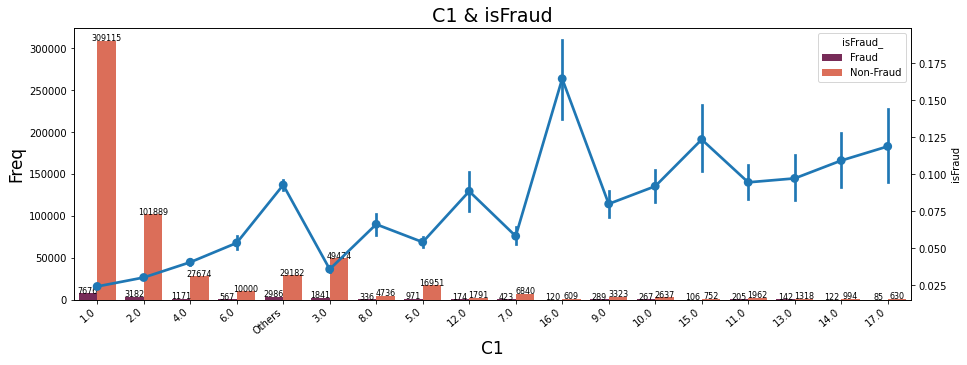

In [52]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    train_transaction,
    filter_list,
    "C1",
    "isFraud_",
    "isFraud",
    "C1",
    "Freq",
    "C1 & isFraud",
    fontsize_text=8,
    palette="rocket",
    figsize_x=15,
    figsize_y=5,
)

##### How to Read The Graph: 
* Countplot shows the count of fraud and non-fraud transactions by C1 column.   
* Pointplot shows percentage of fraud in all transactions of C1 column. 
* x column shows C1 column's situations.
* y column shows; 
    * Count of C1 column by isFraud_ column.
    * Percentage of fraud in all transactions of C1 column.

##### Observations: 
* 1.0, 2.0, 3.0 have most of the transactions. 
* 15.0, 16.0, 17.0 have most fraud transaction rates. 
* The most fraud transaction rate belongs to 16.0. 
* The most fraud transaction count belongs to 1.0. 

#### C2 & isFraud:

In [53]:
train_transaction.loc[
    train_transaction.C2.isin(
        train_transaction.C2.value_counts()[
            train_transaction.C2.value_counts() <= 600
        ].index
    ),
    "C2",
] = "Others"

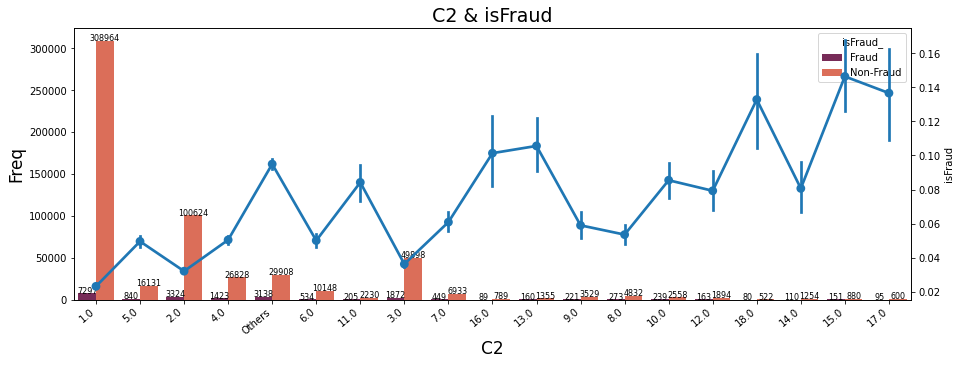

In [54]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    train_transaction,
    filter_list,
    "C2",
    "isFraud_",
    "isFraud",
    "C2",
    "Freq",
    "C2 & isFraud",
    fontsize_text=8,
    palette="rocket",
    figsize_x=15,
    figsize_y=5,
)

##### How to Read The Graph: 
* Countplot shows the count of fraud and non-fraud transactions by C2 column.   
* Pointplot shows percentage of fraud in all transactions of C2 column. 
* x column shows C2 column's situations.
* y column shows; 
    * Count of C2 column by isFraud_ column.
    * Percentage of fraud in all transactions of C2 column.

##### Observations: 
* 1.0, 2.0, 3.0 have most of the transactions. 
* 15.0, 17.0, 18.0 have most fraud transaction rates. 
* The most fraud transaction rate belongs to 15.0. 
* The most fraud transaction counts belongs to 1.0. 

### TransactionAmt & isFraud: 

* I called `histogram_multiple_viz` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize four histograms by a column's conditions and by gets its log. 

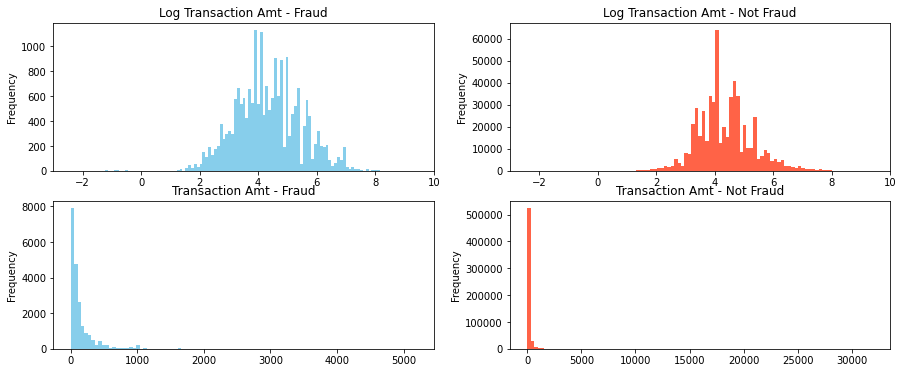

In [55]:
histogram_multiple_viz(
    train_transaction,
    "TransactionAmt",
    "isFraud_",
    "Fraud",
    "Non-Fraud",
    "Log Transaction Amt - Fraud",
    "Log Transaction Amt - Not Fraud",
    "Transaction Amt - Fraud",
    "Transaction Amt - Not Fraud",
    color1="skyblue",
    color2="tomato",
)

##### How to Read The Graph:  
* These graphs show distributions of Fraud and Non-Fraud transactions. First two graphs which are at above show log histogram of transactionAmt by isFraud column. Last two graphs which are at below show histogram of transactionAmt by isFraud column.

##### Observations: 
* Generally at both of conditions (Fraud and Non-Fraud), Transactions have a small amount. But we can see some transactions of Non-Fraud has high amount than fraud transaction's amount. 
* As I explained before there are a lot of outliers in the TransactionAmt column. We can see from these graphs that outliers' reason is not fraud transactions, the reason is about non-fraud transaction amounts. 

### TransactionDT & isFraud: 

* I called `countplot_pointplot_viz` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

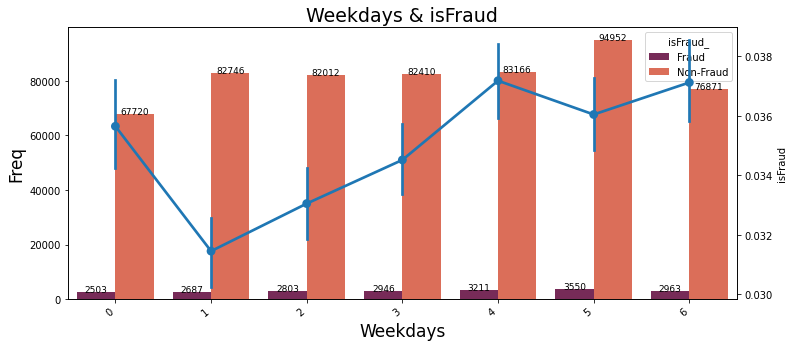

In [56]:
# For seeing weekdays fraud situations:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    train_transaction,
    filter_list,
    "Weekdays",
    "isFraud_",
    "isFraud",
    "Weekdays",
    "Freq",
    "Weekdays & isFraud",
    fontsize_text=9,
    palette="rocket",
)

##### How to Read The Graph: 
* Countplot shows the count of fraud and non-fraud transactions by weekdays.   
* Pointplot shows the percentage of fraud in all transactions of weekdays. 
* x column shows weekdays.
* y column shows; 
    * Count of weekdays by isFraud_ column.
    * Percentage of fraud in all transactions on weekdays.
* 1 = Monday, 2 = Tuesday, 3 = Wednesday, 4 = Thursday, 5 = Friday, 6 = Saturday 0 = Sunday   

##### Observations: 
* First days of week mostly include non-fraud activities than fraud activities. The minimum amount of fraud activities belongs to "Monday". 
* 4 = Thursday, 5 = Friday, 6 = Saturday 0 = Sunday mostly include fraud activities than non-fraud activities. 

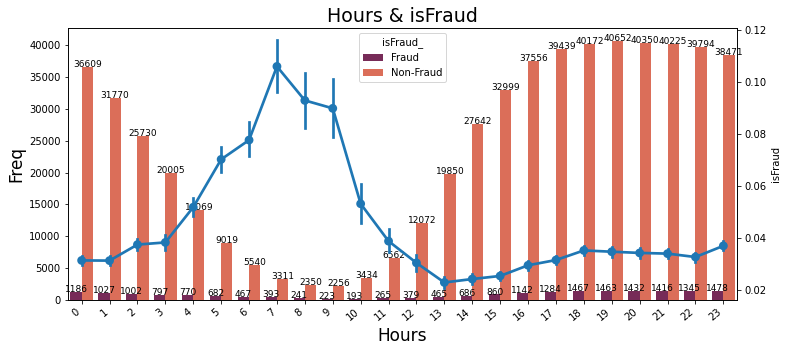

In [57]:
# For seeing hours fraud situations:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    train_transaction,
    filter_list,
    "Hours",
    "isFraud_",
    "isFraud",
    "Hours",
    "Freq",
    "Hours & isFraud",
    fontsize_text=9,
    palette="rocket",
)

##### How to Read The Graph: 
* Countplot shows the count of fraud and non-fraud transactions by hours of day.   
* Pointplot shows the percentage of fraud in hours of day's all transactions. 
* x column shows hours of day.
* y column shows; 
    * Count of hours of day by isFraud_ column.
    * Percentage of fraud in hours of day's all transactions.

##### Observations: 
* The busy hours by transaction count are late evening hours. 
* The busy hours by fraud transaction rate are early evening hours like 5am, 6am, 7am, 8am and 9am. 
* The most fraudulent transaction rate belong to 7am. 
* The most fraudulent transaction count belongs to 23pm. 

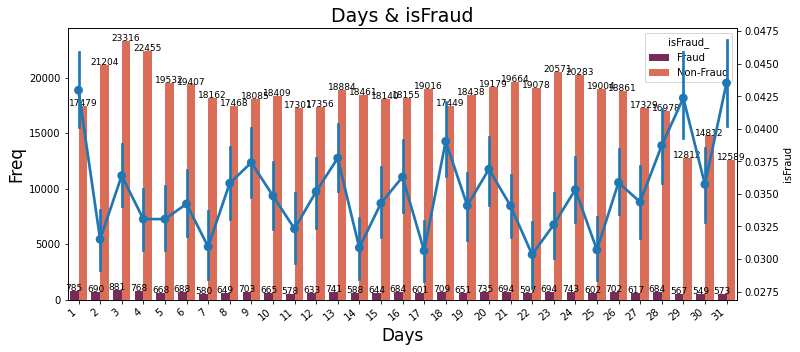

In [58]:
# For seeing hours fraud situations:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    train_transaction,
    filter_list,
    "Days",
    "isFraud_",
    "isFraud",
    "Days",
    "Freq",
    "Days & isFraud",
    fontsize_text=9,
    palette="rocket",
)

##### How to Read The Graph: 
* Countplot shows the count of fraud and non-fraud transactions by days of month.   
* Pointplot shows the percentage of fraud in days of month's all transactions. 
* x column shows weekdays.
* y column shows; 
    * Count of days of month by isFraud_ column.
    * Percentage of fraud in days of month's all transactions.

##### Observations: 
* The busy days by fraud transaction rate belong 1st, 29th, 31th, days of the month.
* The most fraudulent transaction rate belong to 31th day of the month. 
* The most fraud transaction counts belong to the 3rd day of the month. 

## Multivariate Relationships:
### TransactionAmt- TransactionDT & isFraud:

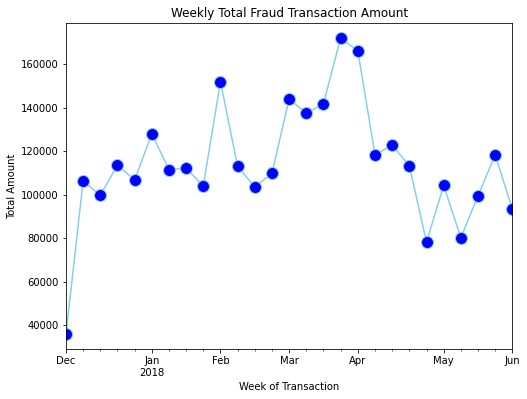

In [59]:
# For fraudulent activities:
fraud_ts = train_transaction.copy()
fraud_ts.set_index("Date", inplace=True)
fraud_ts_week = (
    fraud_ts[fraud_ts["isFraud_"] == "Fraud"]["TransactionAmt"].resample("W").apply(sum)
)
fraud_ts_week.plot(
    marker="o",
    markerfacecolor="blue",
    markersize=12,
    color="skyblue",
    title="Weekly Total Fraud Transaction Amount",
    xlabel="Week of Transaction",
    ylabel="Total Amount",
)
plt.show()

##### Observations:  
* The highest fraud transaction amount belongs in March and April. 

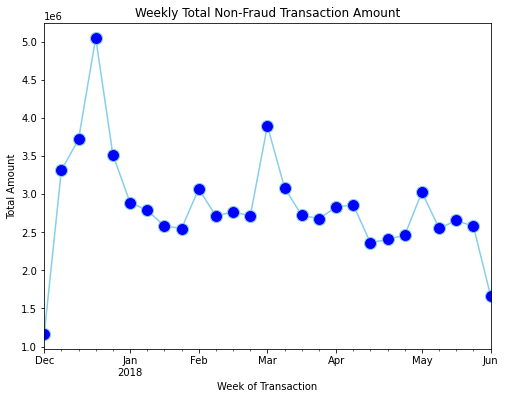

In [60]:
# For Non-Fraud activities:
fraud_ts = train_transaction.copy()
fraud_ts.set_index("Date", inplace=True)
fraud_ts_week = (
    fraud_ts[fraud_ts["isFraud_"] == "Non-Fraud"]["TransactionAmt"]
    .resample("W")
    .apply(sum)
)
fraud_ts_week.plot(
    marker="o",
    markerfacecolor="blue",
    markersize=12,
    color="skyblue",
    title="Weekly Total Non-Fraud Transaction Amount",
    xlabel="Week of Transaction",
    ylabel="Total Amount",
)
plt.show()

##### Observations:  
* The highest non-fraud transaction amount belongs to December. 